In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Metrail+dataset.csv", header=1)
df.columns = ['Month', 'Travellers']
df.head()

,Month,Travellers
0,Feb-91,1638.0
1,Mar-91,1987.0
2,Apr-91,1825.0
3,May-91,NaN
4,Jun-91,1879.0


In [3]:
df['Month'] =  pd.to_datetime(df['Month'], format='%b-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       158 non-null    datetime64[ns]
 1   Travellers  147 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [4]:
df = df.set_index('Month')

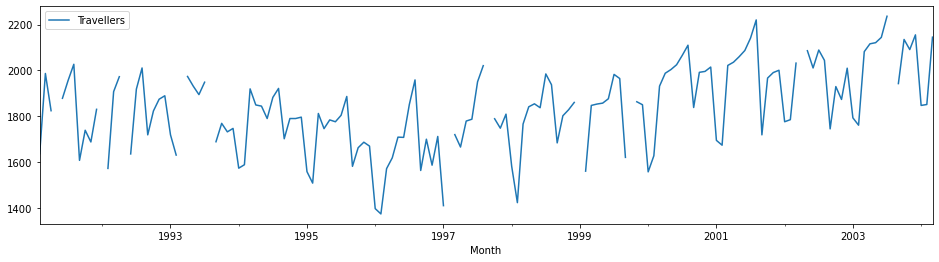

In [5]:
df.plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

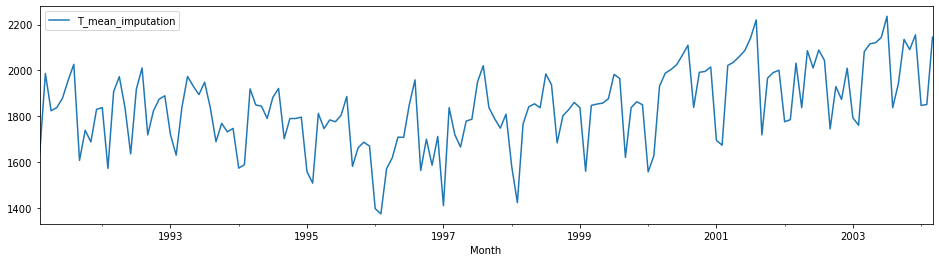

Data Mean After treatment: T_mean_imputation    1838.319728
dtype: float64


In [6]:
# Mean Imputaiton
df = df.assign(T_mean_imputation=df.Travellers.fillna(df.Travellers.mean()))
df[['T_mean_imputation']].plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

print("Data Mean After treatment:", df[['T_mean_imputation']].mean())

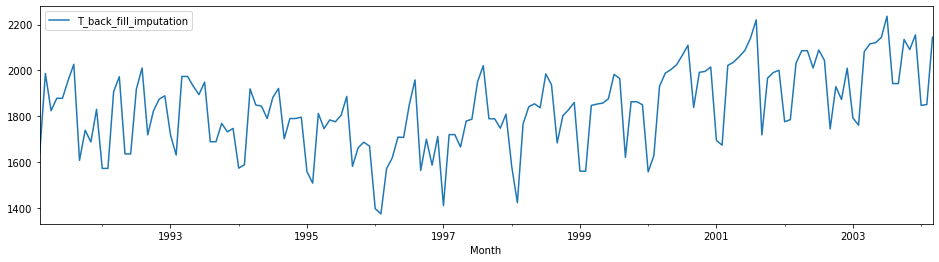

Data Mean After treatment: T_back_fill_imputation    1835.14557
dtype: float64


In [7]:
# last Observed Value Imputaiton 
df = df.assign(T_back_fill_imputation=df.Travellers.fillna(method='bfill'))  # for value forward use "ffill"
df[['T_back_fill_imputation']].plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

print("Data Mean After treatment:", df[['T_back_fill_imputation']].mean())

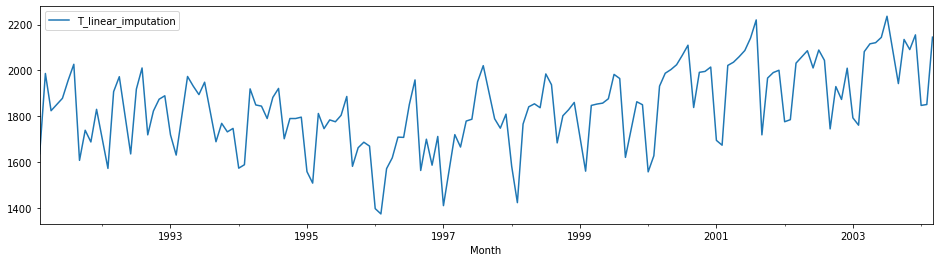

Data Mean After treatment: T_linear_imputation    1837.278481
dtype: float64


In [8]:
# Linear Imputaiton
df = df.assign(T_linear_imputation=df.Travellers.interpolate(method='linear')) 
df[['T_linear_imputation']].plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

print("Data Mean After treatment:", df[['T_linear_imputation']].mean())